In [33]:
import os
import glob
import sys
sys.path.append('/Users/aghavamp/Desktop/Projects')
sys.path.append('/Users/aghavamp/Desktop/Projects/bimanual_wrist')
sys.path.append('/Users/aghavamp/Desktop/Projects/Functional_Fusion')
sys.path.append('/Users/aghavamp/Desktop/Projects/PcmPy')
import getpass

import nibabel as nb
import nitools as nt
import PcmPy as pcm
import Functional_Fusion.atlas_map as am
import Functional_Fusion.reliability as rel

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.cm import ScalarMappable
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.patches as patches
import seaborn as sns

import scipy.io as sio
import numpy as np
import pandas as pd

# SET PATHS:
baseDir = os.path.join('/Users', getpass.getuser(), 'Desktop', 'Projects', 'bimanual_wrist', 'data', 'fMRI')
bidsDir = 'BIDS'
anatomicalDir = 'anatomicals'
freesurferDir = 'surfaceFreesurfer'
surfacewbDir = 'surfaceWB' 
behavDir = 'behavioural'
regDir = 'ROI'
atlasDir = '/Volumes/diedrichsen_data$/data/Atlas_templates/fs_LR_32'
analysisDir = os.path.join(os.path.dirname(os.path.dirname(baseDir)), 'analysis')



# Load & display the 6by6 within-hand structure

estimated by averaging the 6by6 crossval G matrix across subjects and hemispheres for contralateral movements.

[Text(0, 0, 'flx'),
 Text(0, 1, 'flxup'),
 Text(0, 2, 'extup'),
 Text(0, 3, 'ext'),
 Text(0, 4, 'extdn'),
 Text(0, 5, 'flxdn')]

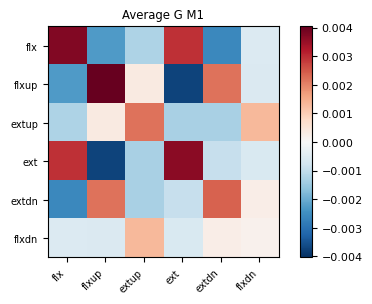

In [21]:
# Load mean 6by6 covariance matrix
region = 'M1' # M1, S1, PMd
file_path = os.path.join(analysisDir, f'pcm_Ghat_avg_6by6_{region}.npz')
data = np.load(file_path)
G_hat = data['G_hat']

# labels:
labels = ['flx', 'flxup', 'extup', 'ext', 'extdn', 'flxdn']

# plot:
plt.rcParams.update({'font.size': 7})
fig, ax = plt.subplots(figsize=(7,3))
vmax_avg = np.abs(G_hat).max()
ax.imshow(G_hat, vmin=-vmax_avg, vmax=vmax_avg, cmap='RdBu_r')
sm = ScalarMappable(cmap='RdBu_r', norm=plt.Normalize(vmin=-vmax_avg, vmax=vmax_avg))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=8)
ax.set_title(f'Average G {region}')
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels)




# Load and display best model prediction for within-hand structure

Best model I fitted was the component model that includes eye(6), reach_return indicators + abduction_adduction indicators

[Text(0, 0, 'flx'),
 Text(0, 1, 'flxup'),
 Text(0, 2, 'extup'),
 Text(0, 3, 'ext'),
 Text(0, 4, 'extdn'),
 Text(0, 5, 'flxdn')]

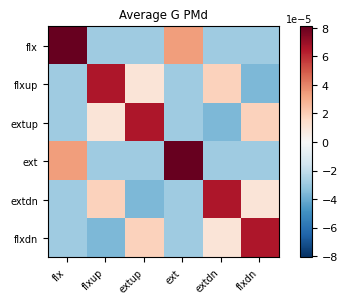

In [32]:
# Load mean 6by6 covariance matrix
region = 'PMd' # M1, S1, PMd
file_path = os.path.join(analysisDir, f'pcm_Ghat_best_within_model_{region}.npz')
data = np.load(file_path)
G_hat = data['G_hat']

# labels:
labels = ['flx', 'flxup', 'extup', 'ext', 'extdn', 'flxdn']

# plot:
plt.rcParams.update({'font.size': 7})
fig, ax = plt.subplots(figsize=(7,3))
vmax_avg = np.abs(G_hat).max()
ax.imshow(G_hat, vmin=-vmax_avg, vmax=vmax_avg, cmap='RdBu_r')
sm = ScalarMappable(cmap='RdBu_r', norm=plt.Normalize(vmin=-vmax_avg, vmax=vmax_avg))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=8)
ax.set_title(f'Average G {region}')
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels)




# Load & display mean 12by12 covariance matrix

estimated by averaging the 12by12 crossval G matrix across subjects and hemispheres.

[Text(0, 0, 'flx'),
 Text(0, 1, 'flxup'),
 Text(0, 2, 'extup'),
 Text(0, 3, 'ext'),
 Text(0, 4, 'extdn'),
 Text(0, 5, 'flxdn'),
 Text(0, 6, 'flx'),
 Text(0, 7, 'flxup'),
 Text(0, 8, 'extup'),
 Text(0, 9, 'ext'),
 Text(0, 10, 'extdn'),
 Text(0, 11, 'flxdn')]

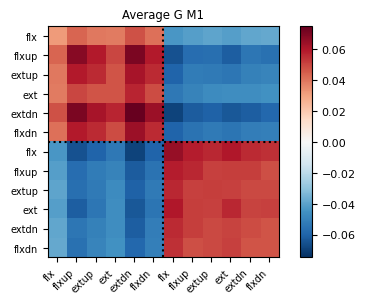

In [29]:
# Load mean 12by12 covariance matrix
region = 'M1' # M1, S1, PMd
file_path = os.path.join(analysisDir, f'pcm_Ghat_avg_12by12_{region}.npz')
data = np.load(file_path)
G_hat = data['G_hat']

# labels:
labels = ['flx', 'flxup', 'extup', 'ext', 'extdn', 'flxdn', 'flx', 'flxup', 'extup', 'ext', 'extdn', 'flxdn']
labels_lateral = ['contra']*6 + ['ipsi']*6 # the first 6 conditions are contralateral, last 6 are ipsilateral

# plot:
plt.rcParams.update({'font.size': 7})
fig, ax = plt.subplots(figsize=(7,3))
vmax_avg = np.abs(G_hat).max()
ax.imshow(G_hat, vmin=-vmax_avg, vmax=vmax_avg, cmap='RdBu_r')
sm = ScalarMappable(cmap='RdBu_r', norm=plt.Normalize(vmin=-vmax_avg, vmax=vmax_avg))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=8)
ax.set_title(f'Average G {region}')
ax.axhline(5.5, color='k', linestyle=':', linewidth=1.5)
ax.axvline(5.5, color='k', linestyle=':', linewidth=1.5)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels)

